In [ ]:
# Evaluate on test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
test_loss /= len(test_loader.dataset)
test_acc = correct / total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

In [ ]:
# Plot training and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Train the model
num_epochs = 30
train_losses = []
valid_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # Validation loss
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    valid_losses.append(val_loss / len(valid_loader.dataset))
    val_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss/len(valid_loader.dataset):.4f}, Val Acc: {val_acc:.4f}")

In [ ]:
# Compile model: define loss function, optimizer, and metrics
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# List model layers
for name, layer in model.named_children():
    print(f"{name}: {layer}")

In [ ]:
# Model summary: number of parameters
print(model)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

In [ ]:
# Define the neural network model in PyTorch
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = Net()

In [ ]:
# Show image for sample index 8 in training set
image, label = train_dataset[8]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {class_names[label]}")
plt.axis('off')
plt.show()

In [ ]:
# Show class name for a sample label
sample_label = next(iter(train_loader))[1][8]
class_names[sample_label]

In [ ]:
# Define class names for MNIST digits
class_names = [str(i) for i in range(10)]

In [ ]:
# Split validation set from training set (first 5000 samples)
from torch.utils.data import random_split
valid_size = 5000
train_size = len(train_dataset) - valid_size
train_subset, valid_subset = random_split(train_dataset, [train_size, valid_size])
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_subset, batch_size=32, shuffle=False)

In [ ]:
# Visualize 9 sample images from the training set
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0
for i in range(3):
    for j in range(3):
        image, label = train_dataset[a]
        axes[i, j].imshow(image.squeeze(), cmap='gray')
        axes[i, j].set_title(f"Label: {label}")
        axes[i, j].axis('off')
        a += 1
plt.show()

In [ ]:
# Download and Load MNIST Dataset using torchvision
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Import Required Libraries for PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# PyTorch Implementation of MNIST Neural Network
This notebook re-implements the original TensorFlow/Keras workflow using PyTorch. It covers loading the MNIST dataset, visualizing samples, preprocessing, building a neural network, training, and evaluating the model.

Its backward so the implementation is up

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


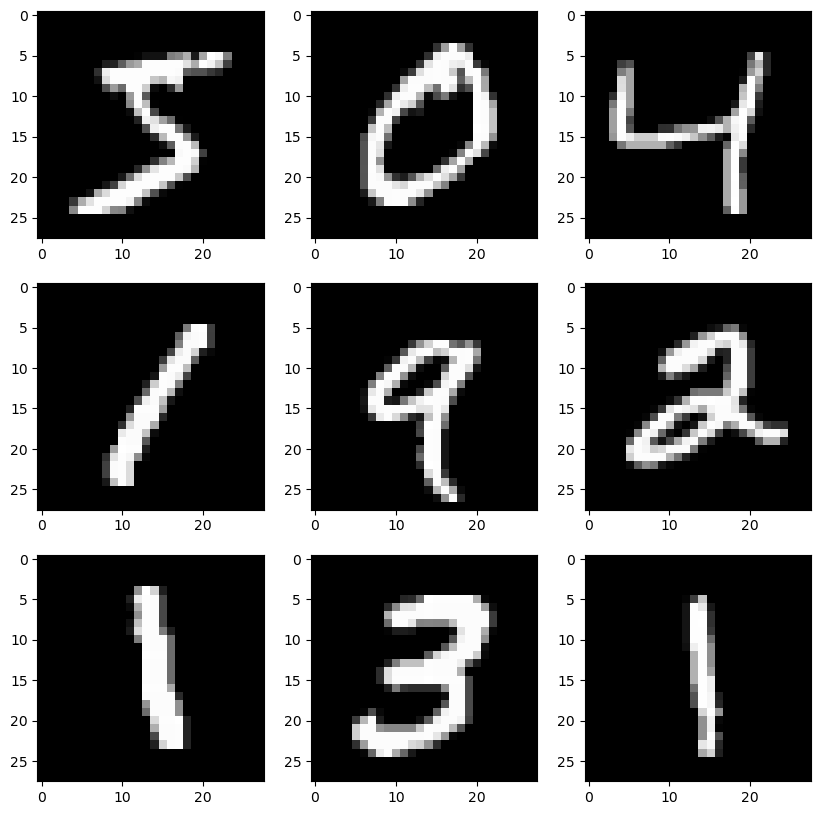

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [5]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [6]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [7]:
class_names[y_train[8]]

'9'

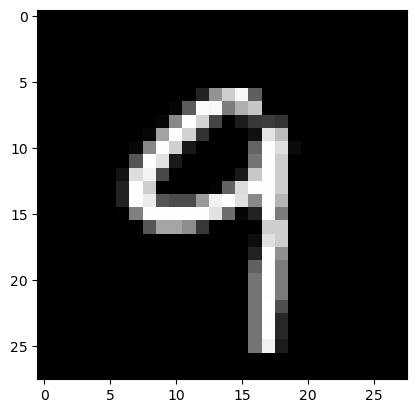

In [8]:
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


c:\ProgramData\anaconda3\envs\tf-nn\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#sparse_categorical_crossentropy- measure on how the model good

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data= (X_valid, y_valid), batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.8386 - loss: 0.6176 - val_accuracy: 0.9178 - val_loss: 0.3013
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.9187 - loss: 0.2862 - val_accuracy: 0.9314 - val_loss: 0.2430
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.9333 - loss: 0.2340 - val_accuracy: 0.9430 - val_loss: 0.2043
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.9426 - loss: 0.2007 - val_accuracy: 0.9506 - val_loss: 0.1798
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.9497 - loss: 0.1756 - val_accuracy: 0.9568 - val_loss: 0.1647
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.9563 - loss: 0.1559 - val_accuracy: 0.9592 - val_loss: 0.1501
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.9605 - loss: 0.1396 - val_accuracy: 0.9636 - val_loss: 0.1344
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.9647 -

(0.0, 1.0)

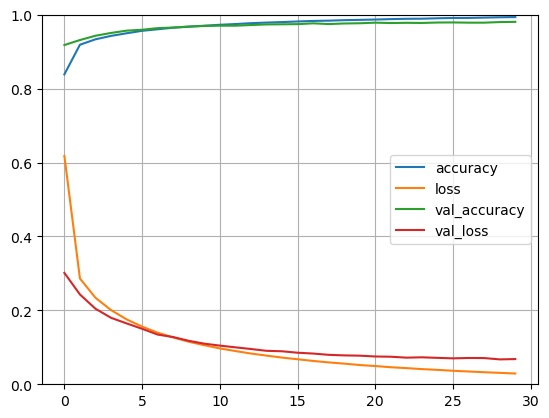

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)

In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9787 - loss: 0.0710


[0.07098216563463211, 0.9786999821662903]

In [19]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


array([[1.2913595e-06, 1.7186316e-07, 4.5259236e-05, ..., 9.9947113e-01,
        1.3291705e-05, 3.2206983e-05],
       [1.3146991e-06, 2.6283591e-04, 9.9898177e-01, ..., 1.5835508e-10,
        1.9014529e-05, 9.5187699e-14],
       [1.6004960e-06, 9.9750334e-01, 2.7142680e-04, ..., 7.1230280e-04,
        1.0209339e-03, 1.9779151e-05],
       ...,
       [6.8270301e-10, 3.8996499e-09, 3.4629324e-10, ..., 1.1678074e-05,
        1.0341251e-06, 3.8669241e-05],
       [9.0890194e-07, 8.8265342e-09, 4.6880838e-10, ..., 2.8310270e-09,
        6.7514360e-05, 6.7076766e-10],
       [4.0030255e-07, 1.1122214e-09, 4.0462547e-07, ..., 1.4242320e-11,
        3.4722418e-09, 4.7951243e-10]], dtype=float32)

In [23]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


array([[1.2913595e-06, 1.7186316e-07, 4.5259236e-05, ..., 9.9947113e-01,
        1.3291705e-05, 3.2206983e-05],
       [1.3146991e-06, 2.6283591e-04, 9.9898177e-01, ..., 1.5835508e-10,
        1.9014529e-05, 9.5187699e-14],
       [1.6004960e-06, 9.9750334e-01, 2.7142680e-04, ..., 7.1230280e-04,
        1.0209339e-03, 1.9779151e-05],
       ...,
       [6.8270301e-10, 3.8996499e-09, 3.4629324e-10, ..., 1.1678074e-05,
        1.0341251e-06, 3.8669241e-05],
       [9.0890194e-07, 8.8265342e-09, 4.6880838e-10, ..., 2.8310270e-09,
        6.7514360e-05, 6.7076766e-10],
       [4.0030255e-07, 1.1122214e-09, 4.0462547e-07, ..., 1.4242320e-11,
        3.4722418e-09, 4.7951243e-10]], dtype=float32)